In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import sqlite3 as sq
import numpy
import seaborn as sns

In [119]:
data = requests.get(
        "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv").text
with open('ikea.csv', 'w', encoding="utf-8") as f:
    f.write(data)
df = pd.read_csv('ikea.csv', sep=',', index_col=0)


Очистка даних. Цей пункт було створено після розуміння даних, але переміщено наперед, задля очистки датафрейма перед вигрузкою в базу даних

In [120]:
df['old_price'] = df['old_price'].replace({'\SR ':''}, regex = True)
df['old_price'] = df['old_price'].replace({',':''}, regex = True)
df['old_price'] = df['old_price'].replace({'/4 pack':''}, regex = True)
df['old_price'] = df['old_price'].replace({'/2 pack':''}, regex = True)
df['old_price'] = df['old_price'].replace({'No old price':''}, regex = True)

Для зручності розмістимо датафрейм в базу даних

In [17]:
connection = sq.connect('Ikea_info.db')
df.to_sql('Ikea_data', connection, if_exists='replace', index=False)
cursor = connection.cursor()
cursor.execute("create table if not exists Ikea_data" +
               "(item_id integer, name text, category text, price integer, old_price integer,sellable_online bool,short_description text, designer text, depth integer,     height integer,    width integer)")

Ще один етап очистки даних. Деяких дизайнерів не було в списку, а замість них в датафреймі був повний опис товару. Він нам не потрібний, замінили значення на NaN  в database

Розберемось з нашими даними. Understanding data

In [20]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [21]:
df.tail()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,99157902,ELVARLI,Wardrobes,750.0,820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,1755,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,1050,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,3130,True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,69157376,ELVARLI,Wardrobes,1231.0,1535,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [25]:
df.shape

(3694, 13)

In [26]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [28]:
df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width'],
      dtype='object')

In [29]:
df.nunique()

item_id              2962
name                  607
category               17
price                 979
old_price             360
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

In [33]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [ ]:
cursor.execute(
    """UPDATE Ikea_data
            SET designer='NaN'
            WHERE designer like '%0%' or designer like "%9%";""")
connection.commit()

In [40]:
des_count=cursor.execute(
    """SELECT count(designer) as count_designer, designer
            FROM Ikea_data
            GROUP BY designer
            ORDER BY COUNT(designer) DESC;""")
des_count=pd.DataFrame(des_count)
des_count.head()

,0,1
0,828,IKEA of Sweden
1,161,Ehlén Johansson
2,151,Francis Cayouette
3,143,NaN
4,134,Ola Wihlborg


In [41]:
des_count.tail()

,0,1
275,1,Chenyi Ke/IKEA of Sweden
276,1,Carl Öjerstam/Marcus Arvonen/IKEA of Sweden
277,1,Carina Bengs/IKEA of Sweden
278,1,C Styrbjörn/M Axelsson
279,1,A Huldén/S Dahlman


Ми розглянули цей масив даних, він не є дуже  великим, але й не маленький, містить 3694 рядка, 13 колонок.
Ми розібрались з колонкою __designer__, в database видалили незрозумілі значення, опираючись на рядки, які включали в собі __item_no__. Було знищено 143 грязних комірки стовпчика __designer__.
Тепер ми можемо якось опиратись на цих дизайнерів. Ми також можемо бачити, що в нас 17 категорій, тут потрібно також детально подивитись інформацію.
 Деякі колонки ми будемо ігнорувати. __Short_description__,__name__, __depth__,__height__, __width__ не будуть мною задіяні.
 Давайте подивимось на залежність __price__ від __designer__ та __category__


C:\Users\sled\AppData\Local\Temp\ipykernel_10284\538176117.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation1=df.loc[:,columns_for_cor1].corr()
C:\Users\sled\AppData\Local\Temp\ipykernel_10284\538176117.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=df.corr()


<AxesSubplot: >

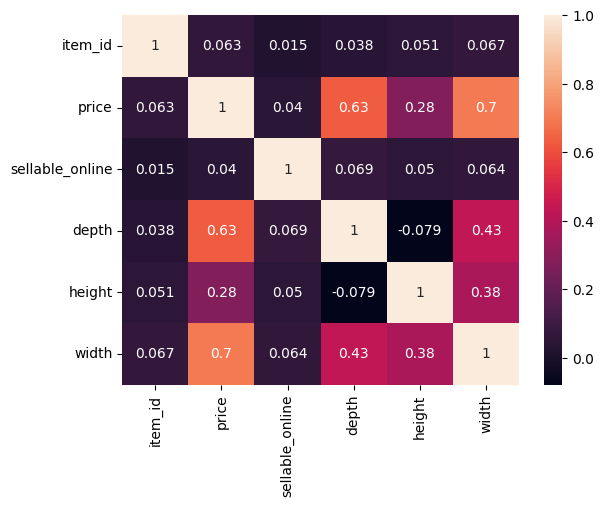

In [53]:
corelation=df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

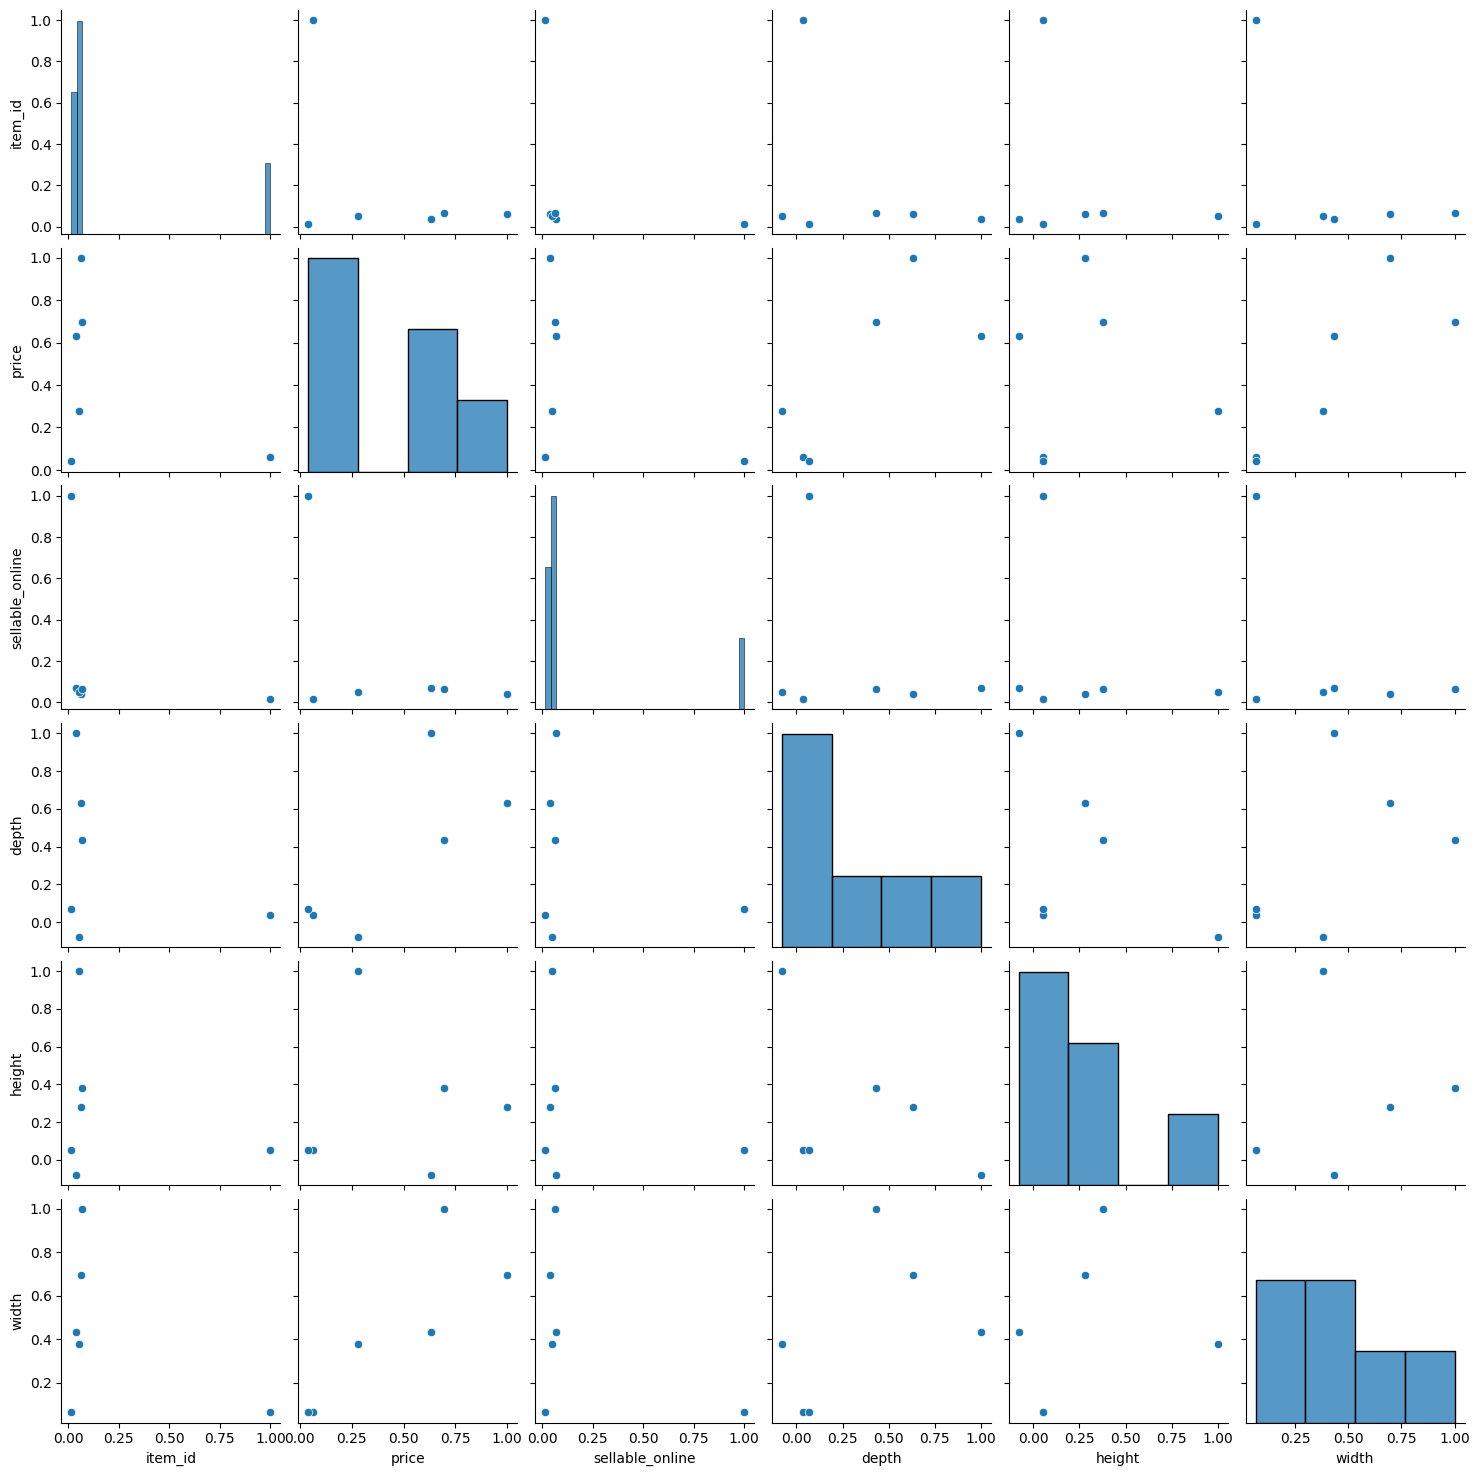

In [54]:
sns.pairplot(corelation)

<AxesSubplot: xlabel='category'>

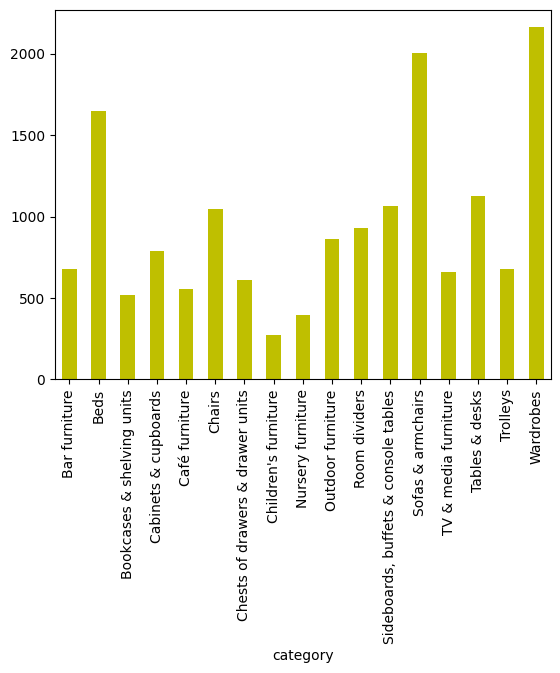

In [63]:
table= pd.pivot_table(df,index=['category'],values=['price'], aggfunc=numpy.mean)
table.plot(kind='bar',color='y',legend=False)

<AxesSubplot: xlabel='designer'>

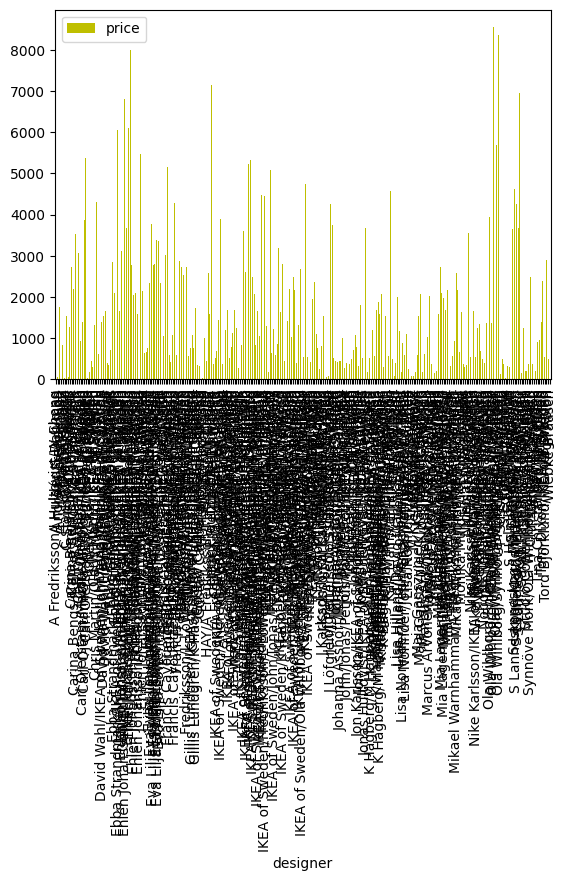

In [75]:
query_1 = pd.read_sql(
    """select designer, price from Ikea_data""",
    connection)
query_1 = pd.DataFrame(query_1)
table= pd.pivot_table(query_1,index=['designer'],values=['price'], aggfunc=numpy.mean)
table.plot(kind='bar',color='y',legend=True)

<AxesSubplot: xlabel='[Ola Wihlborg/IKEA of Sweden/Synnöve Mork, Ola Wihlborg/Synnöve Mork/IKEA of Sweden, Ehlén Johansson/Fredriksson/L Löwenhielm/Hilland, Henrik Preutz/IKEA of Sweden, S Lanneskog/J Marnell/Ola Wihlborg, Ehlén Johansson/Ebba Strandmark/Ola Wihlborg/IKEA of Sweden, Ehlén Johansson/Francis Cayouette/IKEA of Sweden, Ebba Strandmark/IKEA of Sweden/Ola Wihlborg/Ehlén Johansson, Ola Wihlborg/S Lanneskog/J Marnell, Ehlén Johansson/Ola Wihlborg, Carl Öjerstam/S Lanneskog/J Marnell, IKEA of Sweden/Ehlén Johansson/Francis Cayouette, IKEA of Sweden/Ehlén Johansson/Ebba Strandmark, Francis Cayouette/Ehlén Johansson/IKEA of Sweden, IKEA of Sweden/Henrik Preutz, Marcus Arvonen/Andreas Fredriksson, IKEA of Sweden/S Lanneskog/J Marnell, S Lanneskog/J Marnell/IKEA of Sweden, Ola Wihlborg/Ehlén Johansson, Karl Malmvall/Ehlén Johansson, IKEA of Sweden/Francis Cayouette/Ehlén Johansson, IKEA of Sweden/Fredriksson/L Löwenhielm/Hilland/Ehlén Johansson, Chris Martin/Ola Wihlborg/IKEA of Sw

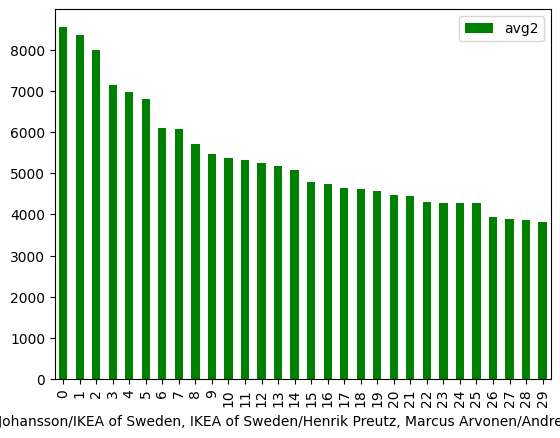

In [85]:
query_2 = pd.read_sql(
    """SELECT avg(price) as avg2, designer
        FROM Ikea_data
        group by designer
        ORDER BY avg(price) DESC
        LIMIT 30""",
    connection)
query_2 = pd.DataFrame(query_2)

query_2.plot(kind='bar',xlabel= query_2['designer'],color='g',legend=True)

Переглянувши дані візуалізації підведемо підсумки.
Є категорії, в яких середня ціна коливається, відповідно є певна залежність ціни від категорії. Перша матриця, хоче нам сказати, що є залежність __price__ від __width__. Переглянули також коливання цін залежно від дизайнерів

Спираючись на даний аналіз, колонки, які ми візьмемо для аналізу будуть: __price, old_price, depth, heigth, width, categiry, other_colours, sellable_online__. Цей аналыз буде першою гіпотезою. Ми сюди не включимо колонку __designer__, оскыльки при переведены текстового формату в цифрове значення, модель буде порівнювати категорійно, а оскільки дизайнерів 280, то порівняння 279>11 звучить досить серьйзно.  
Друга гіпотеза буде включати категорійний показник колонки __designer__

In [326]:
df.loc[df['old_price'] == '', 'old_price'] = 'Nan'

df.loc[df['old_price'] == '', 'old_price'] = 'Nan'
x=df[['price','old_price']].astype(float)
x['old']=x['old_price']-x['price']
x.loc['mean1']=x.mean()
print(x['mean1':])

             price    old_price         old
mean1  1078.208419  1624.577982  264.753976


In [327]:
print(abs(round((1078.208419-264.753976)/1078.208419*100-100,0)))

25.0


Ми встановили, що __old_price__ в середньому змінювалась на 25%.


Заповнимо пропуски даних,  використаємо категорійні значення для кожної колонки. __LabelEncoder__ нам в цьому допоможе

In [391]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


data =df[['price','depth','height', 'width', 'old_price', 'category', 'other_colors', 'sellable_online', 'item_id']].copy()
data=data.dropna()


imp=SimpleImputer(strategy='most_frequent')
data['width']= imp.fit_transform(data[['width']])
data['depth']= imp.fit_transform(data[['depth']])
data['height']= imp.fit_transform(data[['height']])
data['old_price1']=data['price']*1.25
data.drop(columns=['old_price'],axis=1,inplace=True)



enc=LabelEncoder()
data['other_colors']=enc.fit_transform(data['other_colors'])
data['sellable_online']=enc.fit_transform(data['sellable_online'])
data['category']=enc.fit_transform(data['category'])

data.head(15)

,price,depth,height,width,category,other_colors,sellable_online,item_id,old_price1
3,69.0,50.0,100.0,60.0,0,1,1,80155205,86.25
4,225.0,60.0,43.0,74.0,0,0,1,30180504,281.25
5,345.0,45.0,91.0,40.0,0,0,1,10122647,431.25
6,129.0,44.0,95.0,50.0,0,0,1,70404875,161.25
8,129.0,44.0,95.0,50.0,0,0,1,50406465,161.25
10,149.0,44.0,103.0,52.0,0,0,1,90404879,186.25
11,395.0,45.0,102.0,40.0,0,0,1,121766,493.75
12,395.0,47.0,103.0,46.0,0,0,1,397736,493.75
13,177.0,53.0,104.0,43.0,0,0,1,50420329,221.25
14,345.0,52.0,114.0,43.0,0,0,1,400550,431.25


Дані готові до обробки, відсутні пропуски, значення всі числові, гайда тестувати програму.

In [392]:
X=data[['depth','height','width','category','other_colors','sellable_online','old_price1']].values
y=data['price'].values

In [398]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

# Chain together scaling the variables with the model
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.9995903064184962

___Підсумки першої гіпотези___

Було застосовано Pipeline, при запуску методу fit на об'єкті папйплайна автоматично  виконуються кроки перепроцесингу та навчання моделі. Середній показник навченної моделі становить 99%, такий відсоток було досягнуто завдяки підібраним даним та навчальної моделі.
Варто згадати попередні дослідження даних, що вказували на те, що є певна залежність їх від ціни.   
 Доречі, якщо зафіксувати вибірку (random_state=0), або не фіксувати, при тестуванні моделі, було встановлено, що показним залишається сталим, змінюється лише права частина після тисячних. Це підтверджує сталість моделі та коректність підібраних даних до неї.

__Перейдемо до другої гіпотези__

Друга гіпотеза буде включати категорійний показник колонки __designer__
В другій гіпотезі, на відмінну першої, де заповнення __розмірів__ було даними  __most_frequent__, тут використаємо інші дані, це буде __mean__. 
  Скористаємось базою даною, де ми раніше відфільтрували колонку __designer__. 

In [356]:
query_3 = pd.read_sql(
    """SELECT designer, item_id
        FROM Ikea_data""",
    connection)
query_3 = pd.DataFrame(query_2)

In [387]:

dg =df[['price','depth','height', 'width', 'old_price', 'category', 'other_colors', 'sellable_online','designer']].copy()
dg=dg.dropna()


imp=SimpleImputer(strategy='mean')
dg['width']= imp.fit_transform(dg[['width']])
dg['depth']= imp.fit_transform(dg[['depth']])
dg['height']= imp.fit_transform(dg[['height']])
dg['old_price']=dg['price']*1.25
dg['designer']=query_3['designer']


enc=LabelEncoder()
dg['other_colors']=enc.fit_transform(dg['other_colors'])
dg['sellable_online']=enc.fit_transform(dg['sellable_online'])
dg['category']=enc.fit_transform(dg['category'])
dg['designer']=enc.fit_transform(dg['designer'])

dg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 3 to 3688
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1899 non-null   float64
 1   depth            1899 non-null   float64
 2   height           1899 non-null   float64
 3   width            1899 non-null   float64
 4   old_price        1899 non-null   float64
 5   category         1899 non-null   int32  
 6   other_colors     1899 non-null   int32  
 7   sellable_online  1899 non-null   int64  
 8   designer         1899 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 126.1 KB


In [424]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing
from sklearn import utils


model = RandomForestClassifier()
X = dg.drop('price', axis = 1)

y = dg['price']
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)





In [437]:
from sklearn import svm
clf = svm.SVC(gamma=0.001)

In [442]:
clf.fit(X, y)
clf.score(X_train, y_train)

0.836376404494382

In [444]:
#clf.predict(X_test)

___Підсумки другої гіпотези___  
    Навчання моделі з колонкою __designer__ показало гірші результати, аніж без цієї колонки.  
    Показник у 83% здатний також передбачити результати, але категорійний показник колонки __designer__ збиває навчальну модель, оскільки порівняння 279>1 є дуже різьким, і це збиває модель з толку.  
    

__Методи підвищення продуктивності гіпотез__  
  Слід звернути увагу на самий набір даних. Потрібно зрозуміти, чи ми передбачаємо ціну для споживача IKEA, чи для самої IKEA.  
  Якщо передбачення ціни є для ІКЕА, то тут мають бути інші дані, такі як: кількість проданої продукції, собівартість, регіон замовлення, спосіб доставки, і тому інше.
  Якщо передбачення ціни є для іншої сторони, то на мою думку слід попрацювати з колонкою дизайнер. зробити підкатегорії, зробити категорійний поділ, до першої категорії віднести чи це преміум дизайнер чи простий, до другої чи відноситься він до мережі ІКЕА чи є індивідуальний, а також, за можливості на регіональну залежність( чи присутні вироби даного дизайнера у всіх регіонах, де працює ІКЕА, чи в окремих)

__ВИСНОВКИ__  
  Я проаналізував набір даних від ІКЕА, показав навчання двух моделей за власними гіпотезами.  
  Найбільше часу займає вибір колонок, які потрібно віднести до навчальної моделі, вибір методу заповнення пропусків, та вибір методу навчання моделі.  
  Хочу відмітити, що кількість гіпотез, які можна було б перевірити, є досить великим.    
        При аналізі даних, я дійшов до висновку, що дані, які в нас є, непогані для прогнозу ціни на певний товар.
        Найбільше уваги було приділено колонці __designer__, в цілому вона є пагубною для прогнозу ціни, і в моїй роботі це наглядно показано.